In [4]:
#1 DECLARACAO DE CAMINHOS LIBS E VARS
import pandas as pd
dataset = pd.read_csv('base.csv')

In [5]:
#2 ANALISE EXPLORATORIA INICIAL
print("Tipos de Dados:")
print(dataset.dtypes.to_string())
print("\n")
print("Estatísticas Descritivas:")
print(dataset.describe().to_string())
print("\n")
print("Valores Nulos:")
print(dataset.isnull().sum().to_string())
print("\n")
print("Valores Únicos:")
print(dataset.nunique().to_string())

Tipos de Dados:
date                           object
title                          object
location                       object
salary                         object
company_industry               object
education                      object
prior_experience               object
bonus                          object
stocks                         object
total_comp                     object
additional_benefits              bool
tenure_length_period          float64
tenure_length_period_units     object
survey_year                     int64


Estatísticas Descritivas:
       tenure_length_period  survey_year
count            459.000000   555.000000
mean               3.135185  2021.108108
std                2.456234     1.359227
min                0.000000  2019.000000
25%                1.000000  2020.000000
50%                2.000000  2021.000000
75%                4.000000  2022.000000
max               15.000000  2023.000000


Valores Nulos:
date                            0
titl

In [6]:
#3 TRATAMENTO DE DADOS
numeric_cols = ['tenure_length_period']
categorical_cols = ['title', 'location', 'company_industry', 'education', 'prior_experience', 'bonus', 'stocks', 'total_comp']
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].median())
dataset[categorical_cols] = dataset[categorical_cols].fillna('Desconhecido')
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['salary'] = dataset['salary'].str.replace(',', '').str.extract('(\d+)').astype(float)
print(dataset.head())
print(dataset.dtypes)
print(dataset.isnull().sum())
dataset.to_csv('clean_data.csv', index=False)




        date                         title          location    salary  \
0 2020-12-28                Data Scientist  Houston, TX, USA  140000.0   
1 2020-12-28               Program Analyst      Desconhecido   86000.0   
2 2020-12-28                Data Scientist      Desconhecido   85000.0   
3 2020-12-28  Senior Software Engineer (ML      Desconhecido     240.0   
4 2020-12-28       Data Science Consultant        London, UK   65000.0   

             company_industry                           education  \
0                 Oil and Gas       Masters in Applied Statistics   
1  Federal Gov't (non defense                                M.Ed   
2                     Defense  Masters of Science in Data Science   
3                     Fintech            B.S. Stats tier 2 school   
4          Large Tech Company                                 PhD   

                                    prior_experience         bonus  \
0                       2yrs of actuarial experience  Desconhecido   


In [11]:
#4 VERIFICACAO DOS RESULTADOS
import pandas as pd
dataset = pd.read_csv('base.csv')
print("Estatísticas descritivas antes do tratamento:")
print(dataset['tenure_length_period'].describe())
print("\nValores nulos antes do tratamento:")
print(dataset['tenure_length_period'].isnull().sum())
numeric_cols = ['tenure_length_period']
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].median())
print("\nEstatísticas descritivas após o tratamento:")
print(dataset['tenure_length_period'].describe())

# Contar valores nulos após o tratamento
print("\nValores nulos após o tratamento:")
print(dataset['tenure_length_period'].isnull().sum())

# Comparar alguns valores antes e depois do tratamento
print("\nValores antes do tratamento:")
print(dataset.loc[dataset['tenure_length_period'].isnull(), 'tenure_length_period'].head())

print("\nValores após o tratamento:")
print(dataset.loc[dataset['tenure_length_period'].isnull(), 'tenure_length_period'].head())


Estatísticas descritivas antes do tratamento:
count    459.000000
mean       3.135185
std        2.456234
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       15.000000
Name: tenure_length_period, dtype: float64

Valores nulos antes do tratamento:
96

Estatísticas descritivas após o tratamento:
count    555.000000
mean       2.938829
std        2.274274
min        0.000000
25%        1.500000
50%        2.000000
75%        4.000000
max       15.000000
Name: tenure_length_period, dtype: float64

Valores nulos após o tratamento:
0

Valores antes do tratamento:
Series([], Name: tenure_length_period, dtype: float64)

Valores após o tratamento:
Series([], Name: tenure_length_period, dtype: float64)


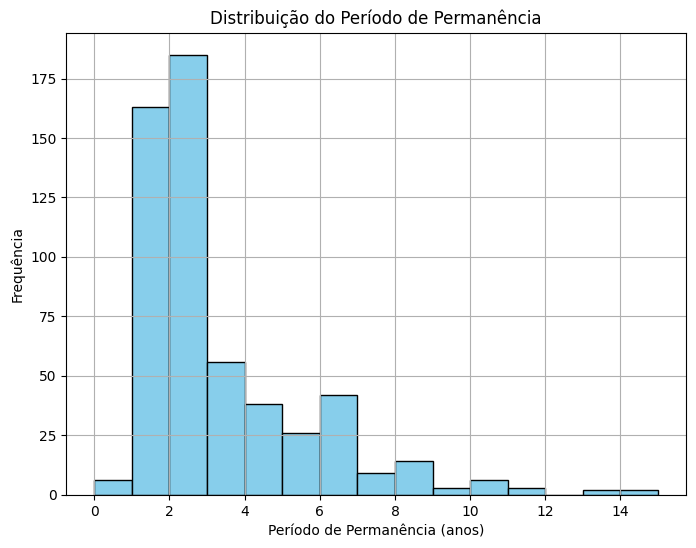

In [12]:
#5 DATAVIZ
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o dataset
dataset = pd.read_csv('clean_data.csv')

# Histograma da coluna 'tenure_length_period'
plt.figure(figsize=(8, 6))
plt.hist(dataset['tenure_length_period'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição do Período de Permanência')
plt.xlabel('Período de Permanência (anos)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()
